## **Inicializando os dados 📃 **

Os dados tem a seguinte forma 


| Clean_text | Category |
|--|--|
| nessa célula existe um tweet de alguma pessoa | nessa célula existe um numero (-1/0/1) que representa o sentimento do tweet sendo -1 ruim e 1 bom |


1. Importamos as bibliotecas que precisamos de utilizar. 
2. Carregamos os dados, e descartamos os valores Nan e duplicados.
3. Transformamos o sentimento em texto. 
4. Obtemos as variáveis dummy.
5. Dividimos o conjunto de dados em conjuntos de treino e testes.

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

dataset = pd.read_csv('./dataset/Twitter_Data.csv')

#drop nan values
dataset = dataset.dropna()

#drop duplicates

dataset = dataset.drop_duplicates()

#transform the sentiment to text
dataset['category'] = dataset['category'].map({-1:'Negative', 1:'Positive', 0:'Neutral'})

#get dummy variables

dataset = pd.get_dummies(dataset, columns=['category'])

print(dataset.head())

x = dataset["clean_text"]

y = dataset.drop(['clean_text'], axis=1)

x = x.to_numpy(dtype="<U43")

y = y.to_numpy()

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

                                          clean_text  category_Negative  \
0  when modi promised “minimum government maximum...                  1   
1  talk all the nonsense and continue all the dra...                  0   
2  what did just say vote for modi  welcome bjp t...                  0   
3  asking his supporters prefix chowkidar their n...                  0   
4  answer who among these the most powerful world...                  0   

   category_Neutral  category_Positive  
0                 0                  0  
1                 1                  0  
2                 0                  1  
3                 0                  1  
4                 0                  1  


1. A primeira camada no nosso modelo é a camada que acabámos de criar acima (codificador). 
2. Após a camada codificadora, adicionamos uma camada de incorporação. Esta camada irá converter o vocabulário codificado inteiro para um vector com dimensões de embedding_dim para cada índice de palavras.
3. A seguir, adicionamos uma camada bidireccional com unidades LSTM=64. Isto devolve uma sequência de vectores da dimensão 64.
4. A seguir, adicionamos uma camada Bidireccional com unidades LSTM=32. Isto retorna um único vector da dimensão 64.
5. Este vector de saída de comprimento fixo é canalizado através de uma camada totalmente ligada (Densa) com 64 unidades escondidas.
6. A última camada está densamente ligada com um único nó de saída.

In [2]:
VOCAB_SIZE = 1000
encoder = tf.keras.layers.TextVectorization(
    max_tokens=VOCAB_SIZE)
encoder.adapt(x_train)


vocab = np.array(encoder.get_vocabulary())
vocab[:20]


model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(len(encoder.get_vocabulary()), 64, mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])

1. Criamos um modelo utilizando a API Sequencial.
2. Adicionamos camadas ao modelo.
3. Compilamos o modelo e especificamos a função de perda e optimizador. 

In [3]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

1. model.fit() treina o modelo para um número fixo de epochs (iterações sobre um conjunto de dados). 
2. epochs=20 especifica que o modelo irá iterar 20 vezes sobre os datos de treino.

In [ ]:
history = model.fit(x_train, y_train,epochs=20)

1. model.evaluate() devolve o valor de perda & valores métricos para o modelo em modo de teste
2. O valor da perda é o valor que o objectivo de optimização do modelo foi minimizado para
3. Os valores métricos são os valores que foram especificados no método de compilação() do modelo

In [76]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

1019/1019 [==============================] - 8s 5ms/step - loss: nan - accuracy: 0.3385
Test Loss: nan
Test Accuracy: 0.3385078012943268


Como o resultado do modelo não foi satisfatório, foi necessário fazer uma nova tentativa, dessa vez com uma nova abordagem.

1. A primeira linha de código é a mesma que a anterior. É utilizado para importar as bibliotecas necessárias.
2. A segunda linha de código é a mesma que a anterior. É utilizada para carregar o conjunto de dados.
3. A terceira linha de código é a mesma que a anterior. É utilizada para dividir o conjunto de dados em conjuntos de treino e testes.
4. A quarta linha de código é a mesma que a anterior. É utilizada para obter o vocabulário do conjunto de treino.
5. A quinta linha de código é a mesma que a anterior. É utilizada para codificar os conjuntos de treino e testes.
6. A sexta linha de código é a mesma que a anterior. É utilizada para definir o modelo.
7. A sétima linha de código é a mesma que a anterior. É utilizada para compilar o modelo.
8. A oitava linha de código é a mesma que a anterior. É utilizada para treinar o modelo.
9. A nona linha de código é a mesma que a anterior. É utilizada para testar o modelo. 
10. A décima linha de código é utilizada para imprimir a perda do teste.
11. A décima primeira linha de código é utilizada para imprimir a precisão do teste.

In [5]:
model2 = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(len(encoder.get_vocabulary()), 64, mask_zero=True),
    tf.keras.layers.LSTM(100, dropout=0.2, recurrent_dropout=0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')
])

tf.keras.optimizers.Adam(learning_rate=0.00146, name='Adam')

model2.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
                optimizer='Adam',
                metrics=['accuracy'])

history2 = model2.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))

test_loss2, test_acc2 = model2.evaluate(x_test, y_test)

print('Test Loss:', test_loss2)
print('Test Accuracy:', test_acc2)

Epoch 1/20


c:\Users\heito\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py:5531: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


4075/4075 [==============================] - 41s 9ms/step - loss: 0.8510 - accuracy: 0.5846 - val_loss: 0.8165 - val_accuracy: 0.5980
Epoch 2/20
4075/4075 [==============================] - 39s 10ms/step - loss: 0.8149 - accuracy: 0.6029 - val_loss: 0.8127 - val_accuracy: 0.6005
Epoch 3/20
4075/4075 [==============================] - 40s 10ms/step - loss: 0.8054 - accuracy: 0.6067 - val_loss: 0.8080 - val_accuracy: 0.6000
Epoch 4/20
4075/4075 [==============================] - 38s 9ms/step - loss: 0.7983 - accuracy: 0.6120 - val_loss: 0.8131 - val_accuracy: 0.6010
Epoch 5/20
4075/4075 [==============================] - 38s 9ms/step - loss: 0.7920 - accuracy: 0.6160 - val_loss: 0.8108 - val_accuracy: 0.6041
Epoch 6/20
4075/4075 [==============================] - 38s 9ms/step - loss: 0.7852 - accuracy: 0.6189 - val_loss: 0.8064 - val_accuracy: 0.6049
Epoch 7/20
4075/4075 [==============================] - 38s 9ms/step - loss: 0.7800 - accuracy: 0.6231 - val_loss: 0.8183 - val_accuracy: 0

Agora o resultado já foi melhor mais ainda não é satisfátorio, vamos salvar e tentar outra abordagem novamente.

In [25]:
model2.save_weights('./modelo2/model2_weights')

#save the model
model2.save('./modelo2/model2')

INFO:tensorflow:Assets written to: ./modelo2/model2\assets


INFO:tensorflow:Assets written to: ./modelo2/model2\assets


O gráfico está plotado abaixo para visualização do modelo

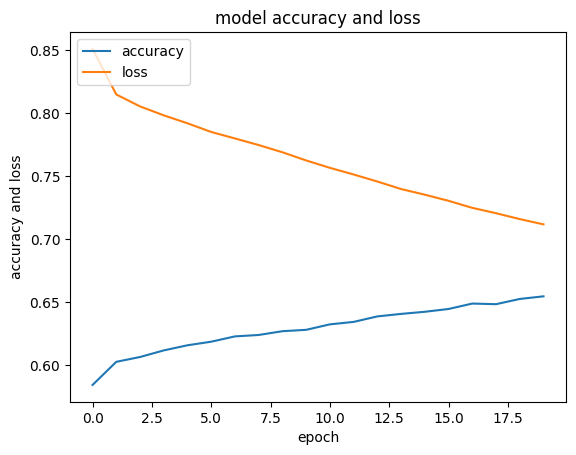

In [10]:
#plot model 2

import matplotlib.pyplot as plt

plt.plot(history2.history['accuracy'])
plt.plot(history2.history['loss'])
plt.title('model accuracy and loss')
plt.ylabel('accuracy and loss')
plt.xlabel('epoch')
plt.legend(['accuracy', 'loss'], loc='upper left')
plt.show()

1. Primeiro lemos os dados utilizando pandas. 
2. Em seguida, transformamos as categorias para a cadeia correspondente.
3. Utilizamos a função pandas get_dummies para transformar a cadeia de caracteres em codificações de uma só corda. 
4. Dividimos os dados em conjuntos de dados de treino e teste.

In [11]:
df = pd.read_csv('./dataset/Twitter_Data.csv')


def transform_category(category):
    if category == 1.0:
        return "Good"
    if category == 0.0:
        return "Neutral"
    if category == -1.0:
        return "Bad"

df['category'] = df['category'].apply(lambda category: transform_category(category))

category = pd.get_dummies(df.category)
df_category = pd.concat([df, category], axis=1)
df_category = df_category.drop(columns='category')

text = df_category['clean_text'].astype(str)
label = df_category[['Bad', 'Good', 'Neutral']].values

category_train, category_test, label_train, label_test = train_test_split(text, label, test_size = 0.3)

1. O tokenizer é criado, utilizando o parâmetro num_words para limitar o tamanho do vocabulário.
O parâmetro oov_token é utilizado para especificar o token que será utilizado para substituir palavras fora de vocabulário durante o método text_to_sequence.
2. O tokenizer é treinado no conjunto de treino. Isto é feito utilizando o método fit_on_texts, onde lhe passamos o conjunto de treino. 
3. O tokenizer é utilizado para converter os conjuntos de treino e teste em sequências. Isto é feito utilizando o método text_to_sequences, onde lhe passamos os conjuntos de treino e testes. 
4. As sequências são então acolchoadas utilizando o método pad_sequences, onde passamos as sequências de treino e teste, e o parâmetro de acolchoamento é definido para indicar que queremos que o acolchoamento seja adicionado antes das sequências.

In [12]:
tokenizer2 = tf.keras.preprocessing.text.Tokenizer(num_words=1920, oov_token="x")
tokenizer2.fit_on_texts(category_train)
tokenizer2.fit_on_texts(category_test)

sekuens_train = tokenizer2.texts_to_sequences(category_train)
sekuens_test = tokenizer2.texts_to_sequences(category_test)

padded_train = tf.keras.preprocessing.sequence.pad_sequences(sekuens_train)
padded_test = tf.keras.preprocessing.sequence.pad_sequences(sekuens_test)

1. Primeiro importamos a biblioteca Keras, depois importamos o modelo Sequencial e a camada Densa
2. Definimos então o modelo, criando um objecto de classe sequencial, e adicionando-lhe as camadas sequencialmente
3. A primeira camada é a camada de incorporação, que é utilizada para converter os índices inteiros em vectores densos.
4. A camada seguinte é a camada LSTM, que é um tipo especial de RNN, capaz de aprender dependências a longo prazo
5. Depois acrescentamos uma camada de rede neural ligada densamente regular, com 128 neurónios e activação ReLU
6. Em seguida, adicionamos uma camada de desprendimento, que é uma técnica para evitar o excesso de equipamento, através da eliminação aleatória de 50% dos neurónios.
7. Finalmente adicionamos a camada de saída, com 3 neurónios e activação softmax

In [26]:
model3 = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=1920, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')
])

1. Estamos a utilizar o Adam optimizer para treinar o modelo.
2. Estamos a utilizar a perda da categorical_crossentropy porque temos mais de 2 classes. 
3. Estamos a utilizar a métrica de precisão para medir o desempenho do modelo.

In [27]:
model3.compile(optimizer = 'Adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])

1. Primeiro, criamos um directório de registo para TensorBoard com um nome que inclui a data/hora actual. Isto permitir-lhe-á visualizar facilmente os registos de TensorBoard para múltiplas execuções. 
2. Em seguida, criamos uma callback de TensorBoard que é configurada para escrever os registos no directório de registos.
3. Finalmente, treinamos o modelo, passando-lhe a chamada de retorno do TensorBoard. 

In [28]:
from packaging import version

logdir="logs/fit/"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

history3 = model3.fit(padded_train, label_train, epochs=10, callbacks=[tensorboard_callback])

Epoch 1/10
3566/3566 [==============================] - 53s 14ms/step - loss: 0.4602 - accuracy: 0.8388
Epoch 2/10
3566/3566 [==============================] - 50s 14ms/step - loss: 0.3482 - accuracy: 0.8923
Epoch 3/10
3566/3566 [==============================] - 57s 16ms/step - loss: 0.3273 - accuracy: 0.8981
Epoch 4/10
3566/3566 [==============================] - 53s 15ms/step - loss: 0.3126 - accuracy: 0.9017
Epoch 5/10
3566/3566 [==============================] - 56s 16ms/step - loss: 0.3013 - accuracy: 0.9038
Epoch 6/10
3566/3566 [==============================] - 54s 15ms/step - loss: 0.2921 - accuracy: 0.9056
Epoch 7/10
3566/3566 [==============================] - 51s 14ms/step - loss: 0.2837 - accuracy: 0.9068
Epoch 8/10
3566/3566 [==============================] - 54s 15ms/step - loss: 0.2752 - accuracy: 0.9086
Epoch 9/10
3566/3566 [==============================] - 56s 16ms/step - loss: 0.2672 - accuracy: 0.9102
Epoch 10/10
3566/3566 [==============================] - 55s 16m

Agora o resultado foi satisfatório

Vamos plotar o grafico novamente para ficar facil de vizualizar

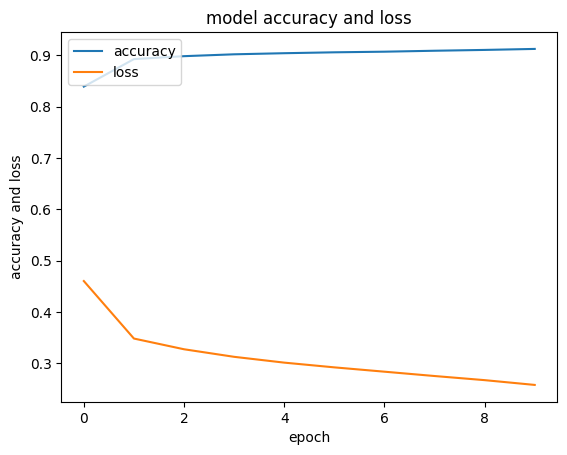

1528/1528 [==============================] - 8s 5ms/step - loss: 0.3498 - accuracy: 0.8961
Test Loss: 0.349810391664505
Test Accuracy: 0.8961426615715027


In [29]:
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['loss'])
plt.title('model accuracy and loss')
plt.ylabel('accuracy and loss')
plt.xlabel('epoch')
plt.legend(['accuracy', 'loss'], loc='upper left')
plt.show()

test_loss3, test_acc3 = model3.evaluate(padded_test, label_test)

print('Test Loss:', test_loss3)
print('Test Accuracy:', test_acc3)

Agora vamos salvar o último modelo

In [30]:
model3.save_weights('./modelo3/model3_weights')

#save the model
model3.save('./modelo3/model3')

INFO:tensorflow:Assets written to: ./modelo3/model3\assets


INFO:tensorflow:Assets written to: ./modelo3/model3\assets


E savalvar o tokenizer

In [31]:
#save the tokenizer

import pickle

with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer2, handle, protocol=pickle.HIGHEST_PROTOCOL)


vamos iniciar o TensorBoard para vizualizar

In [32]:
import tensorboard
tensorboard.__version__

'2.10.1'

Para ter acesso ao tensorboard executo esse comando no terminal:
tensorboard --logdir ./AI/logs

## Screenshots

![Grafico](https://i.imgur.com/w9UxbYD.png)